# Prerequirements

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

import tensorflow as tf
from keras import backend as K
from tensorflow import keras

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
def imshow(img: np.array):
    if img.shape[0] * 2 > img.shape[1]:
        fig = plt.figure(figsize=(7, 7))
    else:
        fig = plt.figure(figsize=(20, 20))
    plt.axis('off')
    plt.imshow(img)

In [6]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (K.sum(y_true_f + y_pred_f))

In [7]:
def jaccard_distance(y_true, y_pred, smooth=100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth

In [8]:
X = sorted(glob.glob('./data/test/samples_masked/*.png'))
Y = sorted(glob.glob('./data/test/samples/*.png'))

In [10]:
X = list(map(lambda x: np.array(PIL.Image.open(x)) / 255, X))
Y = list(map(lambda x: np.array(PIL.Image.open(x)) / 255, Y))

# Autoencoder

In [12]:
model = keras.models.load_model('./models/autoencoder/', custom_objects = {"dice_coef": dice_coef, "jaccard_distance": jaccard_distance})

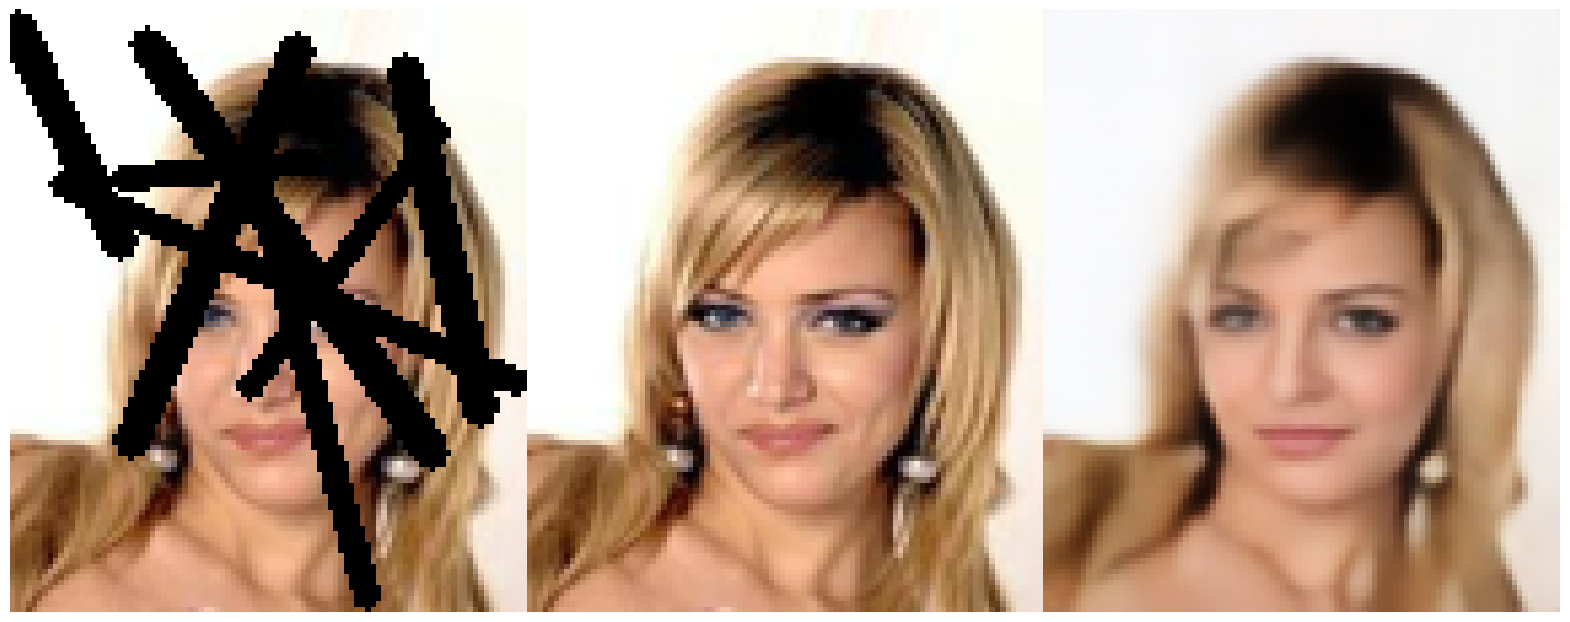

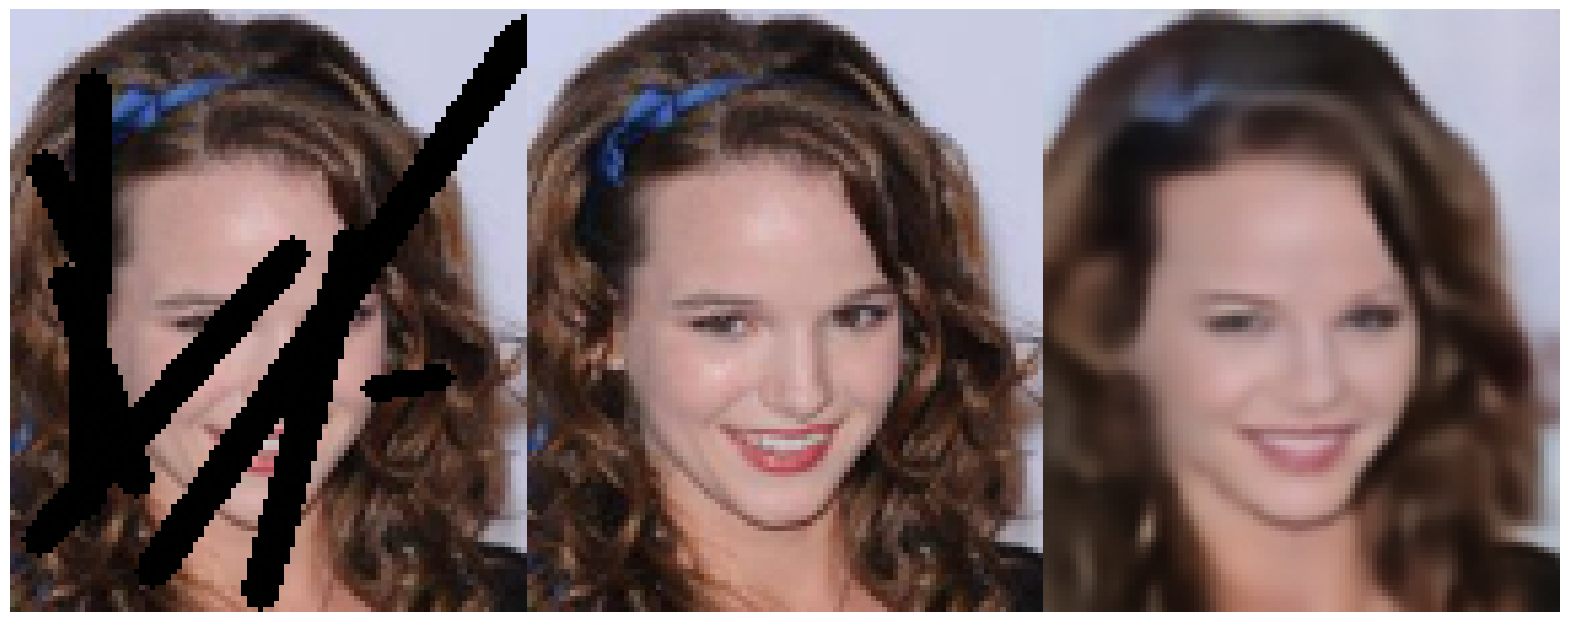

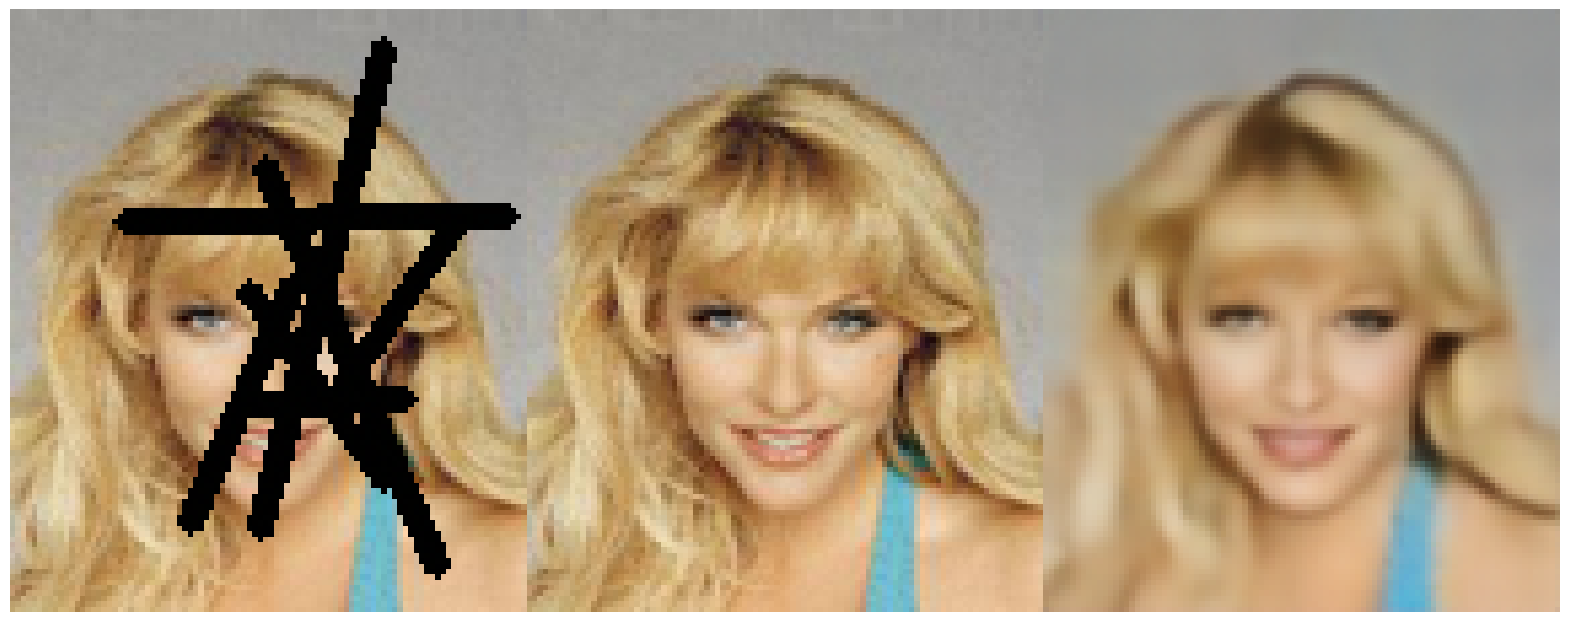

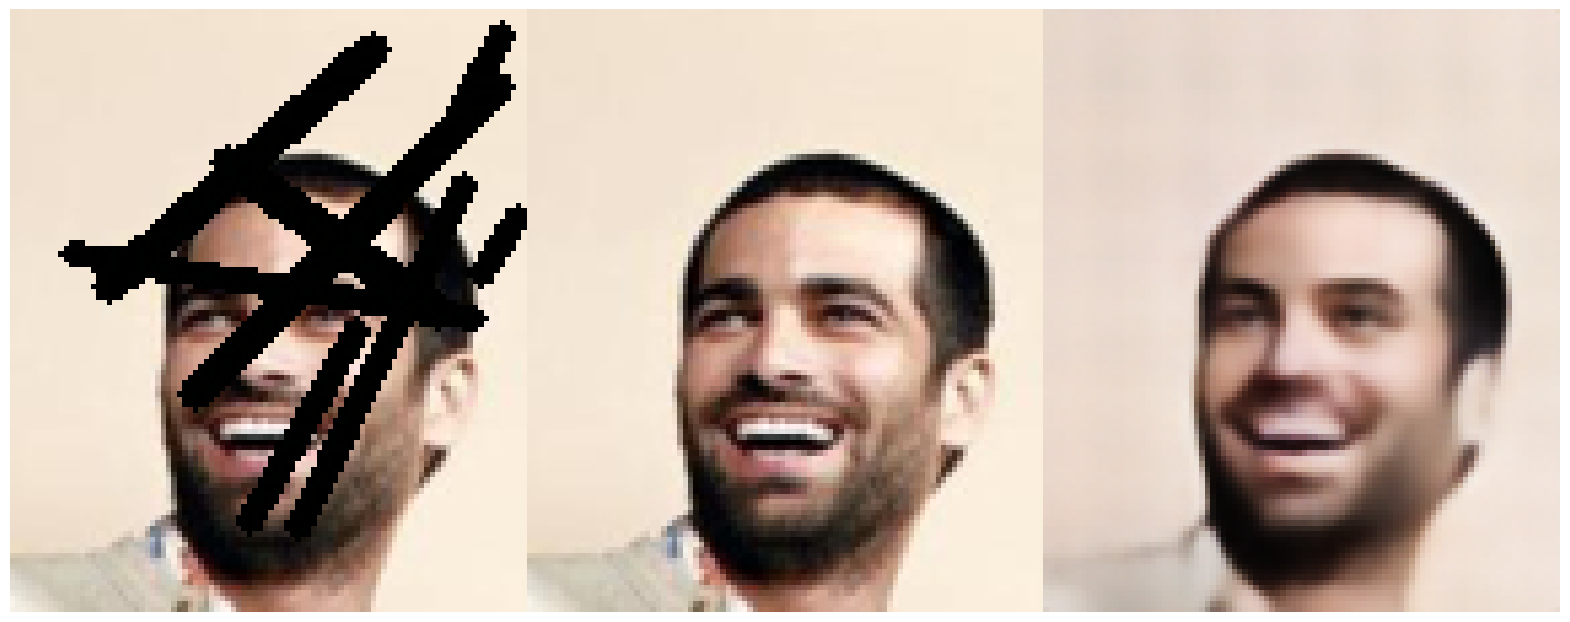

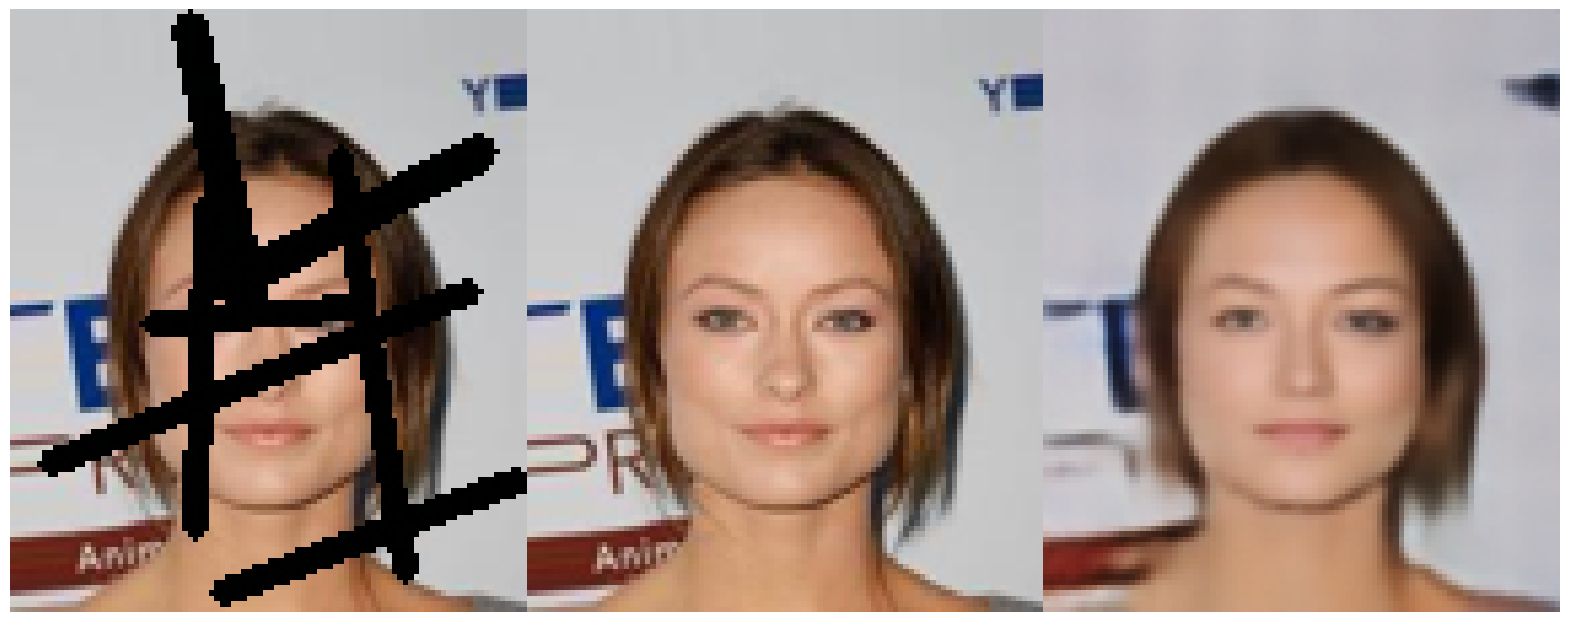

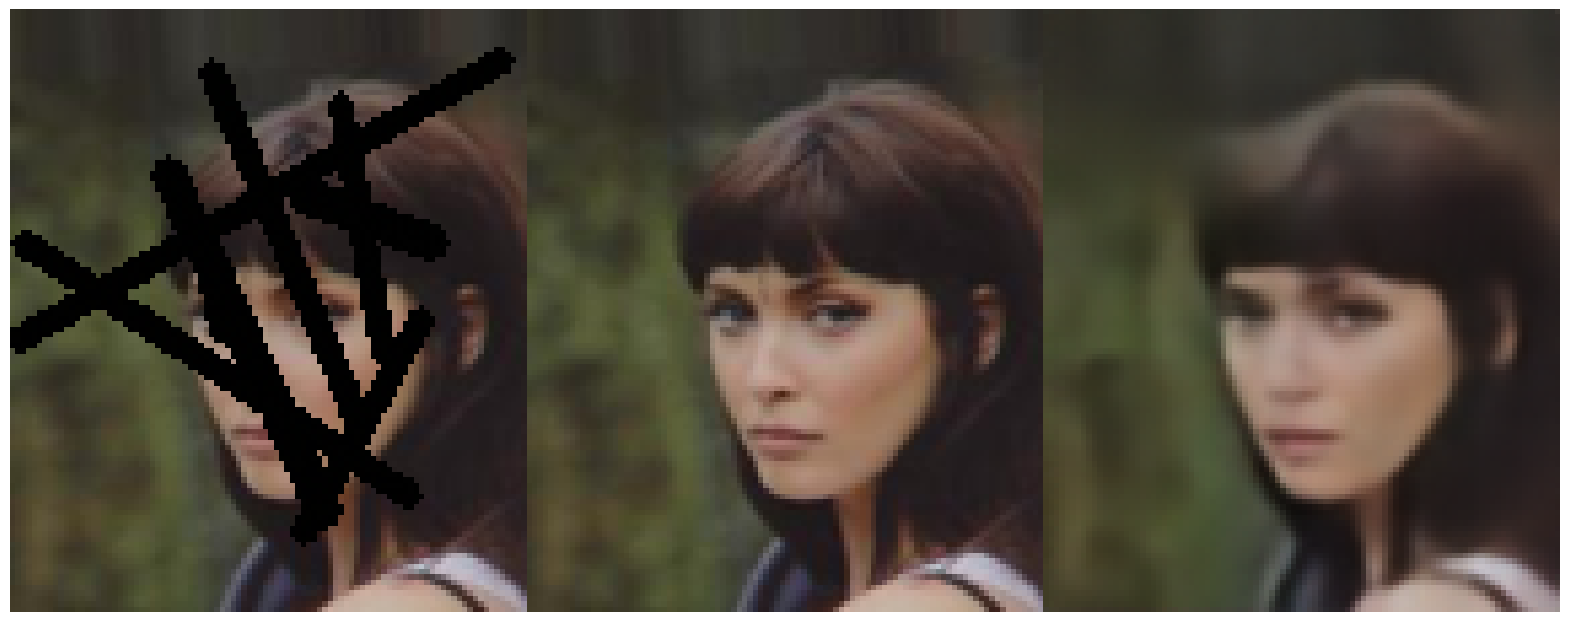

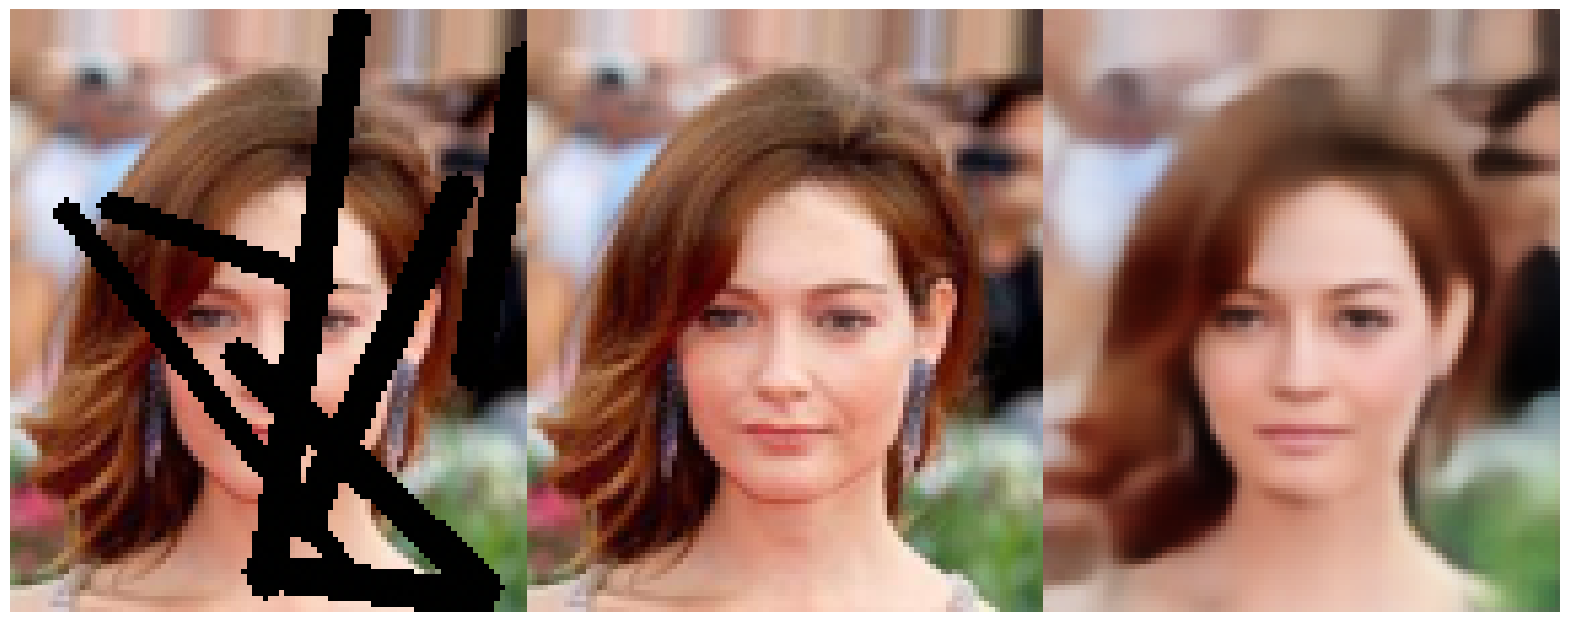

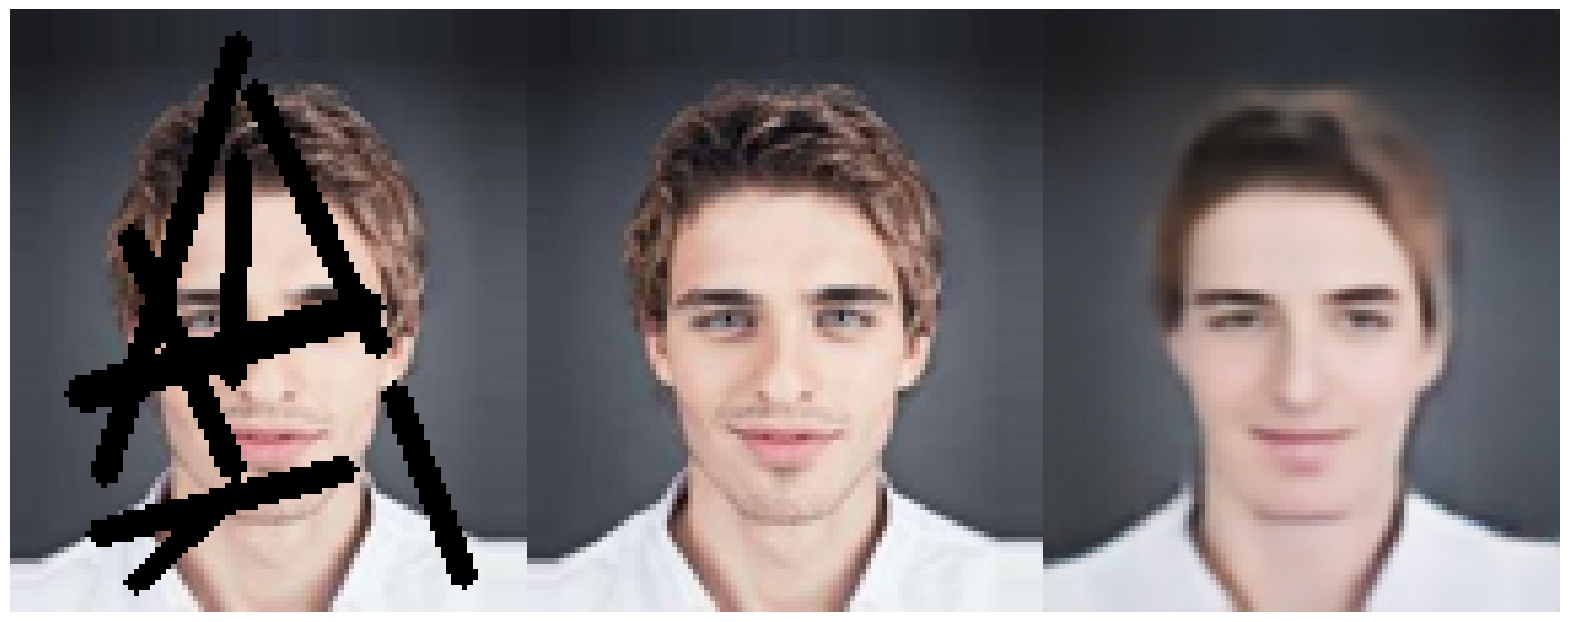

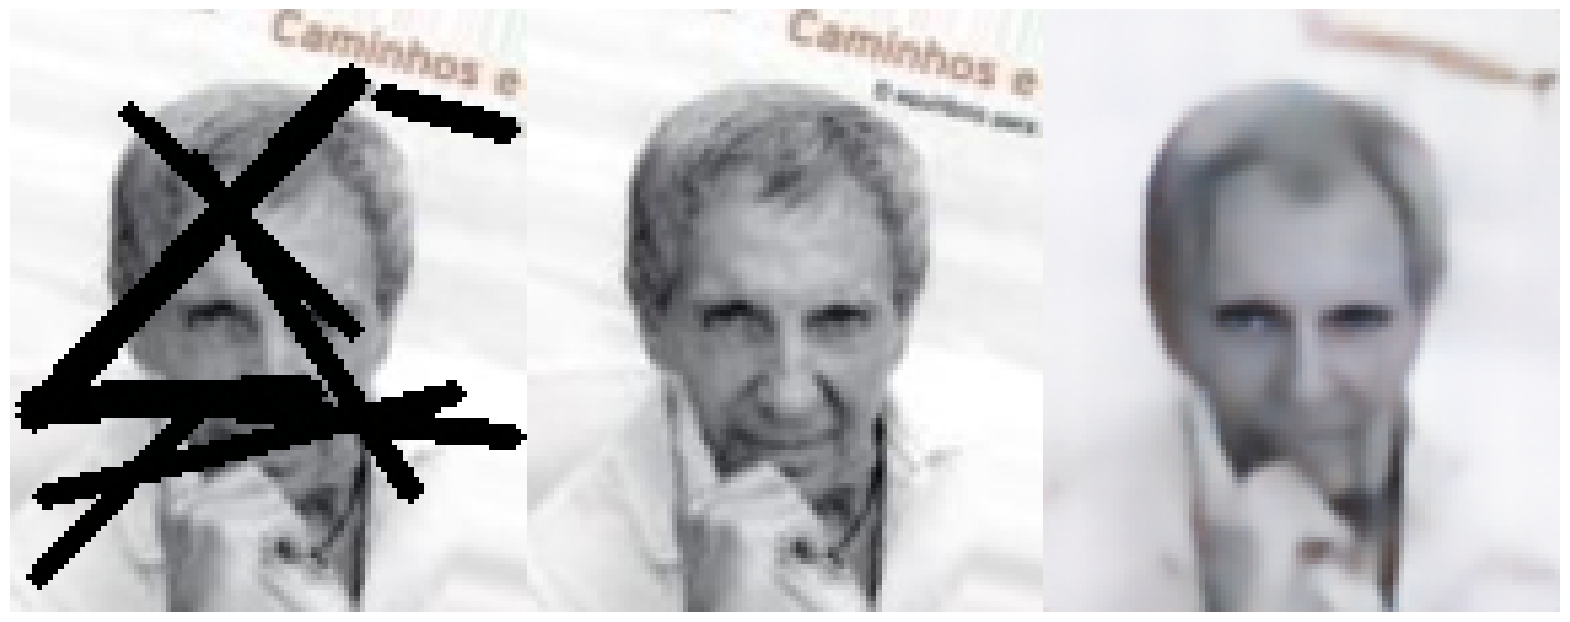

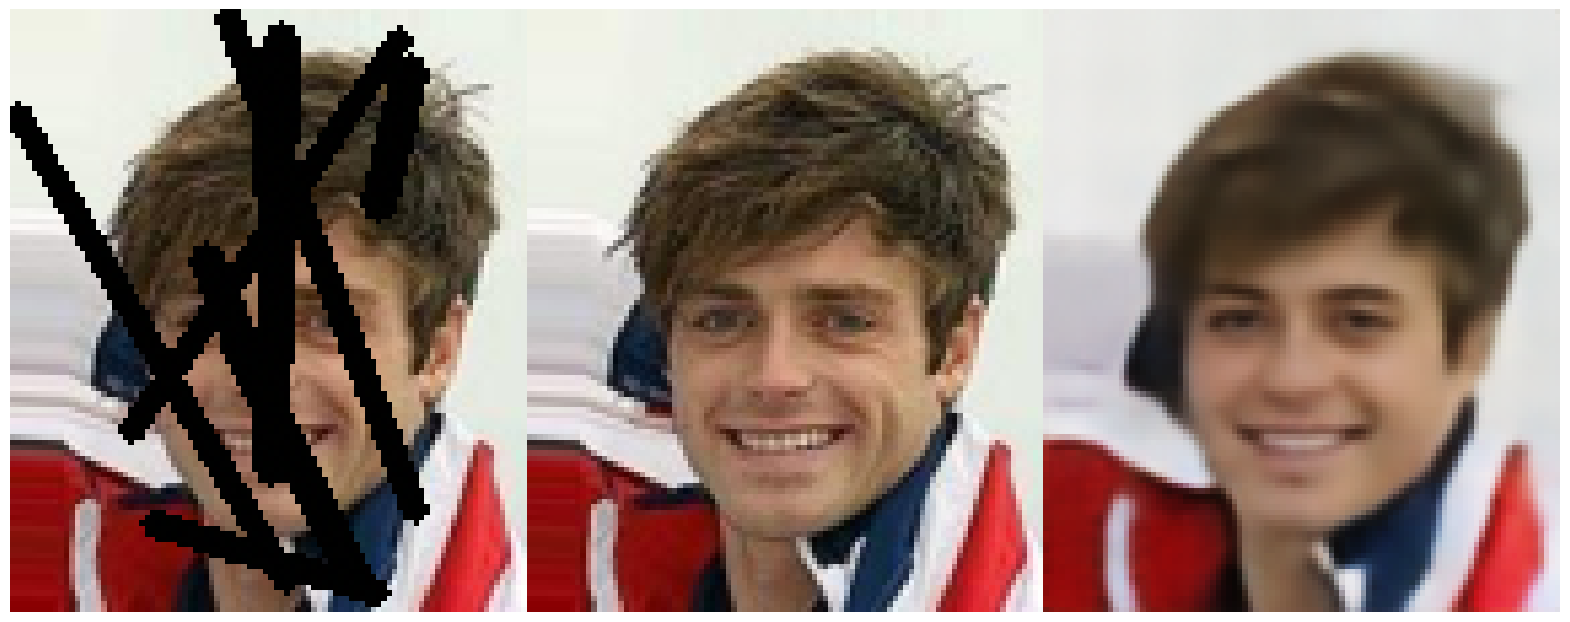

In [24]:
for i, (sample, label) in enumerate(zip(X, Y)):
    pred = model.predict(np.array([sample]), verbose=0).reshape(112, 96, 3)
    res = np.concatenate([sample, label, pred], axis=1)
    imshow(res)
    res = PIL.Image.fromarray((res*255).astype('uint8'))
    res.save(f"./images/autoencoder/{i}.png")